This notebook presents an example of using Principle Component Analysis.

Date Created: 12 Feb 2018
<br>
Last Modified: 12 Oct 2018 
<br>
Humans Responsible: The Prickly Pythons
<br>
Kernel used: Python 2
<br>
<br>
Most material below is from http://sebastianraschka.com/Articles/2014_pca_step_by_step.html
<br>
<br>
Very nice slide presentation including Principle Component Regression: http://fisher.stats.uwo.ca/faculty/braun/ss3850/notes/sas10.pdf

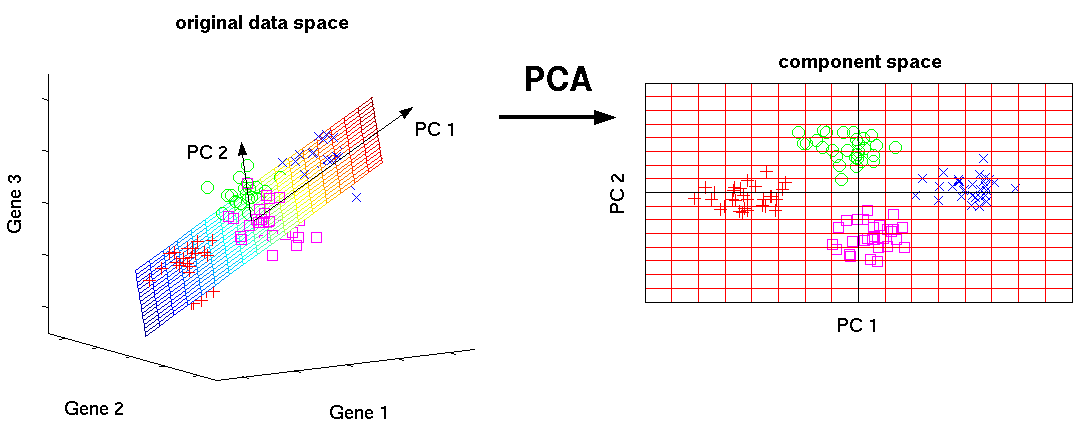

In [1]:
from IPython.display import Image
Image(filename='illustration.png',width=700)

Illustration (and nice explanation) here: https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/ 

## Setup

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
np.random.seed(2342347) # random seed for consistency

# Reducing a 3D dataset to a 2D dataset by dropping 1 dimension. 
<br>
Start by creating some vectors of data:

In [3]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

Populating the interactive namespace from numpy and matplotlib


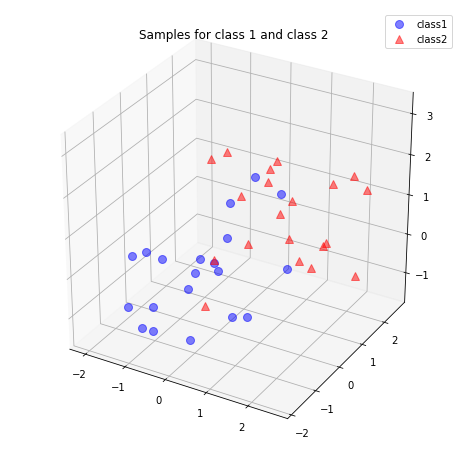

In [4]:
%pylab inline

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

Because we don’t need class labels for the PCA analysis, let us merge the samples for our 2 classes into one 3×403×40-dimensional array.

In [5]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

## 1. The mean vector

In [6]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

('Mean Vector:\n', array([[ 0.32576538],
       [ 0.37601327],
       [ 0.33054809]]))


## 2. The Scatter Matrix

In [7]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

('Scatter Matrix:\n', array([[ 53.3484232 ,  23.19069091,  21.46467362],
       [ 23.19069091,  52.8014702 ,  17.55487511],
       [ 21.46467362,  17.55487511,  51.1236242 ]]))


## 3. The Covariance Matrix

In [8]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

('Covariance Matrix:\n', array([[ 1.36790829,  0.5946331 ,  0.55037625],
       [ 0.5946331 ,  1.35388385,  0.450125  ],
       [ 0.55037625,  0.450125  ,  1.31086216]]))


## 4. Computing eigenvectors and values

In [9]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[ 0.6131328 ]
 [ 0.57507225]
 [ 0.54162726]]
Eigenvalue 1 from scatter matrix: 94.060933071
Eigenvalue 1 from covariance matrix: 2.41181879669
('Scaling factor: ', 38.999999999999972)
----------------------------------------
Eigenvector 2: 
[[ 0.78845466]
 [-0.48805716]
 [-0.37435206]]
Eigenvalue 2 from scatter matrix: 28.8020178753
Eigenvalue 2 from covariance matrix: 0.738513278854
('Scaling factor: ', 38.999999999999979)
----------------------------------------
Eigenvector 3: 
[[-0.04906558]
 [-0.65657606]
 [ 0.75266224]]
Eigenvalue 3 from scatter matrix: 34.4105666541
Eigenvalue 3 from covariance matrix: 0.882322221899
('Scaling factor: ', 38.999999999999993)
----------------------------------------


### 4.1 Visualize the eigenvectors

Populating the interactive namespace from numpy and matplotlib


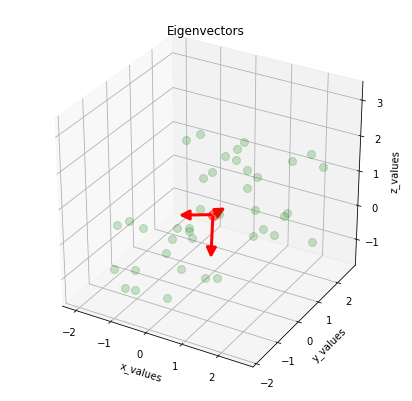

In [10]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

## 5. Sorting the eigenvectors by decreasing eigenvalues

In [11]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

94.060933071
34.4105666541
28.8020178753


## 6. Choose k eigenvectors with the largest eigenvalues

In [12]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

('Matrix W:\n', array([[ 0.6131328 , -0.04906558],
       [ 0.57507225, -0.65657606],
       [ 0.54162726,  0.75266224]]))


## 7. Transform the samples onto the new subspace

In [13]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

### 7.1 Visualize result

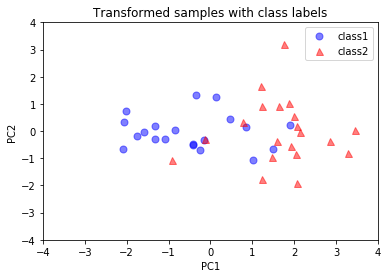

In [14]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

Principle Component Regression will use the components with the most variance to do regression on a selected variable, see these slides (from slide number 11): http://fisher.stats.uwo.ca/faculty/braun/ss3850/notes/sas10.pdf